#**Day 6 with Python**

Logistic Regression

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas 

data = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/Day6/Social_Network_Ads.csv')

Total Number of rows in train: 360
Total Number of rows in test: 40
Accuracy = 0.8


<function matplotlib.pyplot.show>

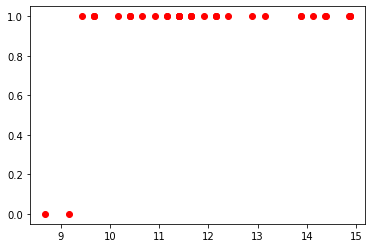

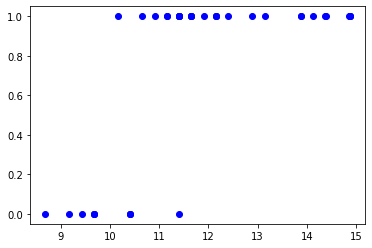

In [132]:
import numpy as np
import math

def normalize( X ) :
  X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
  return X

def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def gradientDescent(X, y, y_hat):
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).

    # Gradient of loss w.r.t weights.
    temp = y_hat-y.reshape(-1,1)
    dw = (1/m)*np.dot(X.T, temp)
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    return dw, db

X = data.iloc[:,2:4].values
Y = data.iloc[:,-1].values
m,n = np.shape(X)
X = normalize(X)

s_f = 0.9
n_train = math.floor(s_f * m)
n_test = math.ceil((1-s_f) * m)
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])


learningrate = 0.01
iterations = 300
w = np.zeros((n,1))
b = 0
losses = []
# beta = gradientDescent(X_train, Y_train, beta, learningrate, iterations, cost_history)
for i in range(iterations):
  y_hat = sigmoid(np.dot(X_train, w) + b)

  dw, db = gradientDescent(X_train, Y_train, y_hat)

  w -= learningrate*dw
  b -= learningrate*db

  l = loss(Y_train, sigmoid(np.dot(X_train, w) + b))
  losses.append(l)

def predict(X): 
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    return np.array(pred_class)

y_pred = predict(X_test)
# print(y_pred)

accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == Y_test[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

# print(X)


import matplotlib.pyplot as plt
plt.figure(1)
plt.scatter(np.dot(X_test, w),y_pred,c='red')
plt.figure(2)
plt.scatter(np.dot(X_test, w),Y_test,c='blue')
plt.show

# plt.figure(2)
# plot_reg(X_test, Y_test, w)
# plt.scatter(data['Age'], data['Purchased'])
# plt.show()
